# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

In [ ]:
volume has correllation with height but it is weaker
I'd guess 
intercept -15
slope 

corr 20%

**(b) Describe the relationship between volume and diameter of these trees.**

In [ ]:
volume has direct strong corr with diameter
intercept 0 
slope 3

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

In [ ]:
diameter

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/utils.csv')

In [4]:
df.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

<Axes: xlabel='Average Monthly Temperature', ylabel='Average Bill'>

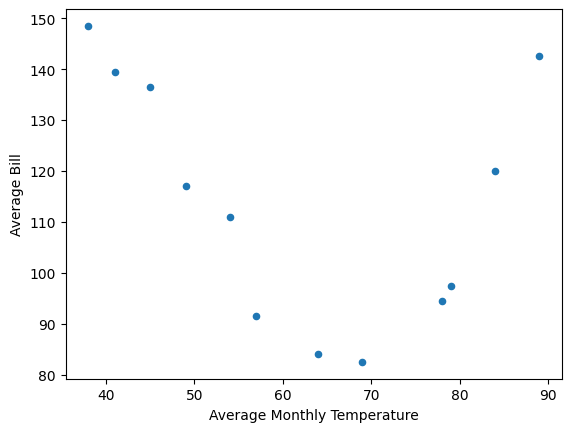

In [ ]:
df.plot(kind='scatter', y='Average Bill', x='Average Monthly Temperature')

#bill

In [7]:
df = df.rename(columns={
    "Average Bill": "avg_bill",
    "Average Monthly Temperature": "avg_temp"
})

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

In [ ]:
it is clearly dependable but not linear

**(d) Train a simple linear regression model using scikit-learn**

In [ ]:
x = df[['avg_temp']]  
y = df['avg_bill']

model = LinearRegression()
model.fit(x, y)

model.intercept_
model.coef_

array([-0.47988442])

**(e) Calculate and interpret the value of $R^2$.**  

In [14]:
from sklearn.metrics import r2_score

y_pred = model.predict(x)

**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [ ]:
print ('intercept=',model.intercept_, 'coef=',model.coef_)

#baseline bill is 143$, then multiply temp by -0,48

intercept= 143.62280506779285 coef= [-0.47988442]


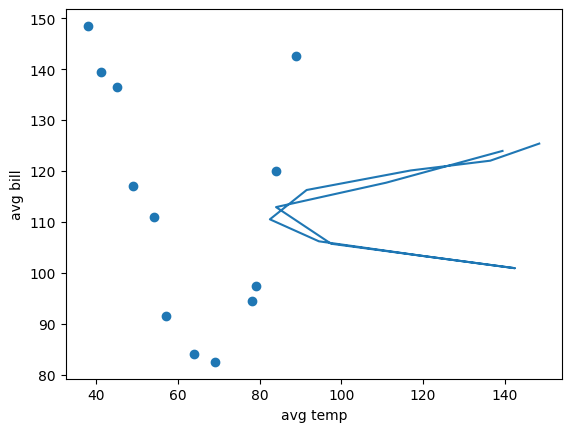

In [27]:
plt.scatter(x, y)
plt.plot(y, y_pred)
plt.xlabel("avg temp")
plt.ylabel("avg bill")
plt.show()

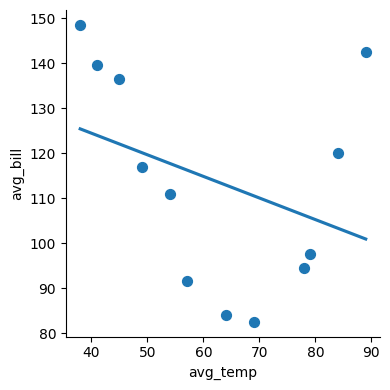

In [29]:
import seaborn as sns

# Show the results of a linear regression within each dataset
sns.lmplot(x="avg_temp", y="avg_bill", data=df,
            ci=None, palette='muted', height=4, scatter_kws={"s": 50, "alpha": 1});

In [38]:
df.head()

,Month,avg_bill,avg_temp
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


In [39]:
from scipy.stats import linregress

def get_summarystats(df):
    # x = avg_temp, y = avg_bill
    res = linregress(df["avg_temp"], df["avg_bill"])
    slope = res.slope
    intercept = res.intercept
    r_value = res.rvalue
    p_value = res.pvalue
    std_err = res.stderr
    return slope, intercept, r_value, p_value, std_err

In [41]:
get_summarystats(df)

(np.float64(-0.4798844187597244),
 np.float64(143.62280506779285),
 np.float64(-0.3522292385463154),
 np.float64(0.26148718319410547),
 np.float64(0.40322465315688033))

In [42]:
# Defining function which calculates residuals and plots them
def get_residuals(df, color='green'):
    slope, intercept, _, _, _ = get_summarystats(df)
    # store true y values
    obs_values = df['avg_bill'] 
    # store predicted y values
    pred_values = slope * df['avg_temp'] + intercept
    # calculate residuals
    residuals = obs_values - pred_values
    # plot residuals
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(df['avg_temp'], residuals, color=color)
    ax.set_ylabel("Avg_bill")
    ax.set_xlabel("Avg_temp")
    fig.suptitle('Residual Scatter Plot')
    plt.show()

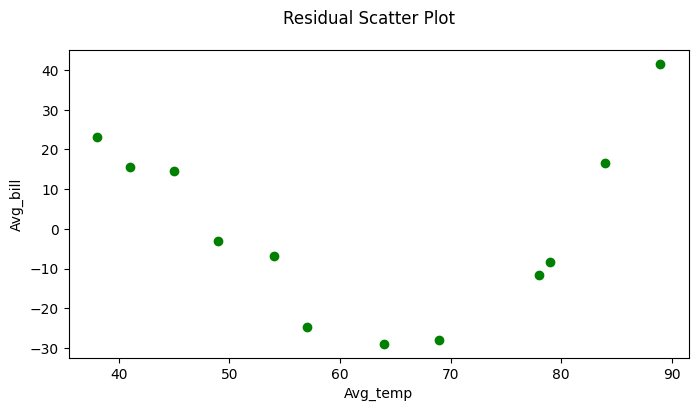

In [43]:
get_residuals(df, color='green')

**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [ ]:
res = linregress(df["avg_temp"], df["avg_bill"])
y_pred = res.slope * 120 + res.intercept
y_pred

#not reasonable

np.float64(86.03667481662592)